## Primer ejemplo

Para este ejemplo se utiliza data generada con la función make_classificationde sklear

In [28]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn import svm
from sklearn import tree
from matplotlib import pyplot as plt
import numpy as np

X1, Y1 = datasets.make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

x1_scaled = preprocessing.scale(X1)

Y1 = Y1 * 2 -1


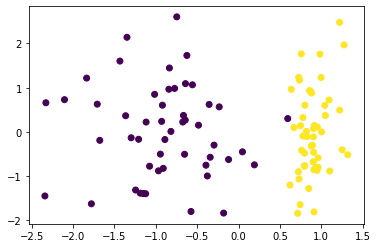

In [29]:
plt.scatter(x1_scaled[:,0], x1_scaled[:,1], c=Y1)

In [30]:
clf = svm.SVC()
clf.fit(x1_scaled, Y1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
# create a mesh to plot in
x_min, x_max = x1_scaled[:, 0].min() - 1, x1_scaled[:, 0].max() + 1
y_min, y_max = x1_scaled[:, 1].min() - 1, x1_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

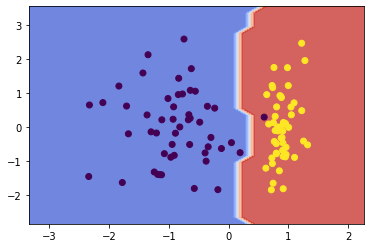

In [32]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x1_scaled[:,0], x1_scaled[:,1], c=Y1)
plt.show()

In [33]:
clfTree = tree.DecisionTreeClassifier()

clfTree = clfTree.fit(x1_scaled, Y1)

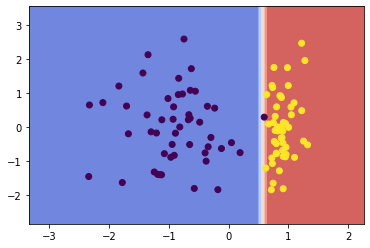

In [34]:
Z = clfTree.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x1_scaled[:,0], x1_scaled[:,1], c=Y1)
plt.show()

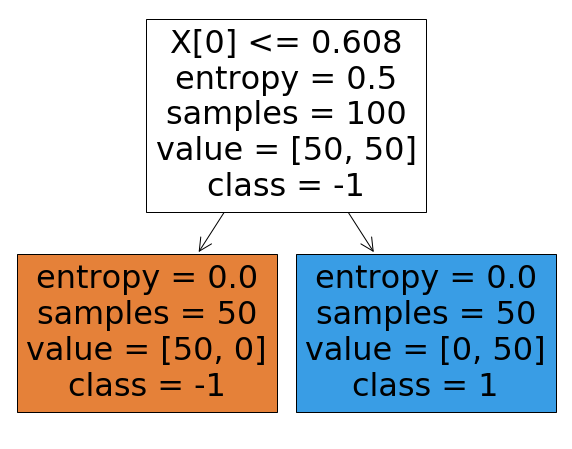

In [35]:
plt.figure(figsize=(10,8))
x = tree.plot_tree(clfTree,filled=True, class_names=['-1','1']) 

## Segundo ejemplo

Para este ejemplo se usara la base de datos de IRIS y vamos a ignorar una de las clases, ya que SVM hace solo clasificación binaria

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


iris = datasets.load_iris()
# Filter and conserve tipe 0 and 2 of iris
cond = (iris.target != 1)
# Preprocess dataset to be used in SVM
y = iris.target[cond] - 1
y = y.astype('float')
x = iris.data[cond].astype('float')
x = preprocessing.scale(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [49]:
clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)

Z = clf.predict(X_test)

confusion_matrix(y_test, Z)

array([[16,  0],
       [ 0,  9]], dtype=int64)

In [50]:
clfTree = tree.DecisionTreeClassifier()
clfTree = clfTree.fit(X_train, y_train)

Z = clfTree.predict(X_test)

confusion_matrix(y_test, Z)

array([[16,  0],
       [ 0,  9]], dtype=int64)

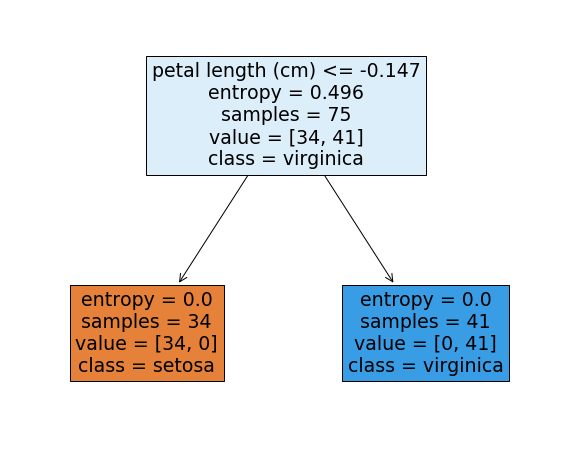

In [51]:
plt.figure(figsize=(10,8))
classes = [iris.target_names[0],iris.target_names[2]]
x = tree.plot_tree(clfTree,filled=True,feature_names=iris.feature_names,class_names=classes) 

## Tercer ejemplo

Ejemplo con datos reales

In [107]:
#Prepare The data
import pandas as pd

airline = pd.read_csv('airline.csv')

In [108]:
airline.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [109]:
valuesToReplace = {
    'Loyal Customer': 1, 
    'disloyal Customer':0,
    'Personal Travel': 1,
    'Business travel': 0,
    'satisfied': 1,
    'neutral or dissatisfied': -1
}

airline = airline.replace(valuesToReplace)

In [110]:
airline.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,1,13,1,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,-1
1,1,5047,Male,0,25,0,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,-1
2,2,110028,Female,1,26,0,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,1,25,0,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,-1
4,4,119299,Male,1,61,0,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,5,111157,Female,1,26,1,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,-1
6,6,82113,Male,1,47,1,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,-1
7,7,96462,Female,1,52,0,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,1
8,8,79485,Female,1,41,0,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,-1
9,9,65725,Male,0,20,0,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,-1


In [117]:
# Preprocess dataset to be used in SVM
airline = airline[['Customer Type', 'Age', 'Type of Travel', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']]
airline = airline[~airline.isin([np.nan, np.inf, -np.inf]).any(1)]

y = airline['satisfaction']
x = airline[['Customer Type', 'Age', 'Type of Travel', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']]
x = preprocessing.scale(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [118]:
clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)

Z = clf.predict(X_test)

confusion_matrix(y_test, Z)

array([[10998,  3623],
       [ 2067,  9211]], dtype=int64)

In [119]:
clfTree = tree.DecisionTreeClassifier()
clfTree = clfTree.fit(X_train, y_train)

Z = clfTree.predict(X_test)

confusion_matrix(y_test, Z)

array([[10670,  3951],
       [ 4220,  7058]], dtype=int64)

In [123]:
from sklearn.tree import export_text

plt.figure(figsize=(10,8))
classes = ['Satisfied', 'neutral or dissatisfied']
text = export_text(clfTree,feature_names=['Customer Type', 'Age', 'Type of Travel', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']) 

text

'|--- Type of Travel <= 0.41\n|   |--- Customer Type <= -0.82\n|   |   |--- Age <= -0.98\n|   |   |   |--- Arrival Delay in Minutes <= -0.25\n|   |   |   |   |--- Age <= -1.65\n|   |   |   |   |   |--- Age <= -2.04\n|   |   |   |   |   |   |--- Flight Distance <= 0.24\n|   |   |   |   |   |   |   |--- Flight Distance <= -0.55\n|   |   |   |   |   |   |   |   |--- Flight Distance <= -0.57\n|   |   |   |   |   |   |   |   |   |--- class: -1\n|   |   |   |   |   |   |   |   |--- Flight Distance >  -0.57\n|   |   |   |   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |   |   |--- Flight Distance >  -0.55\n|   |   |   |   |   |   |   |   |--- class: -1\n|   |   |   |   |   |   |--- Flight Distance >  0.24\n|   |   |   |   |   |   |   |--- Flight Distance <= 0.28\n|   |   |   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |   |   |--- Flight Distance >  0.28\n|   |   |   |   |   |   |   |   |--- class: -1\n|   |   |   |   |   |--- Age >  -2.04\n|   |   |   |   |   |   |--- De

<Figure size 720x576 with 0 Axes>